# Exploring Cloud DA Forward Operator

shawn.s.murdzek@noaa.gov

In [1]:
import pyDA_utils.cloud_DA_forward_operator_viz as cfov
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Run observation operator
%run /mnt/lfs4/BMC/wrfruc/murdzek/src/pyDA_utils/cloud_DA_forward_operator.py /lfs4/BMC/wrfruc/murdzek/real_obs/decoded_bufr_for_cloudDA/202202011300.rap.prepbufr.csv /mnt/lfs4/BMC/wrfruc/murdzek/RRFS_Ens_Cloud_DA/Feb2022_retro/Ens_GDAS_SDLVDL_noGF_cloud1/v0.6.2/prod/rrfs_conus_3km_ensda.20220201/12/mem0001/rrfs.t12z.natlev.f001.conus_3km.grib2

start time: 20240502 22:34:17

reading in BUFR obs...
reading in model UPP output...


Identifying cloud obs...
Interpolating model columns to obs locations...
Imposing height limits and min cld fraction...
Adding clear obs and interpolating model clouds in column to ob heights...

O-B RMSD = 55.7270862723726

Done! Elapsed time = 32.729338 s


In [9]:
from importlib import reload
cfov = reload(cfov)

ModuleNotFoundError: spec not found for the module 'cloud_DA_forward_operator_viz'

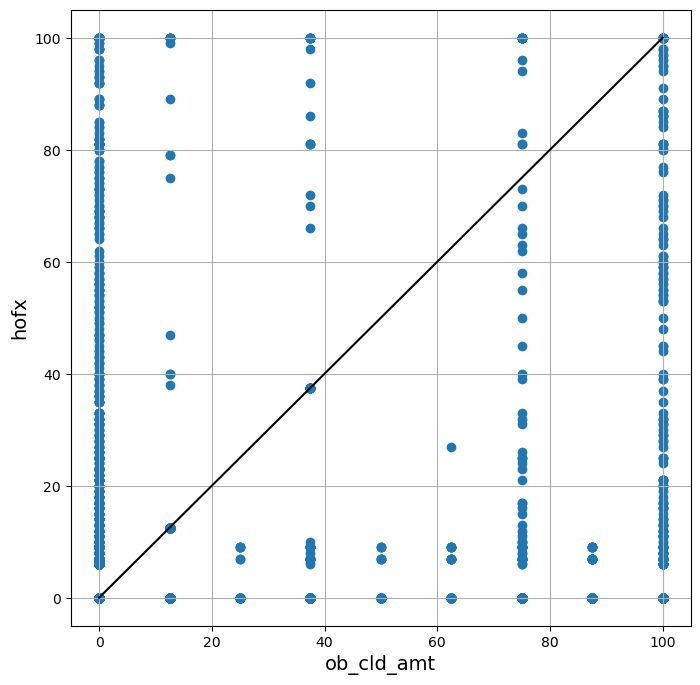

In [3]:
cld_hofx_viz = cfov.sfc_cld_forward_operator_viz(cld_hofx)
cld_hofx_viz.scatterplot()
plt.show()

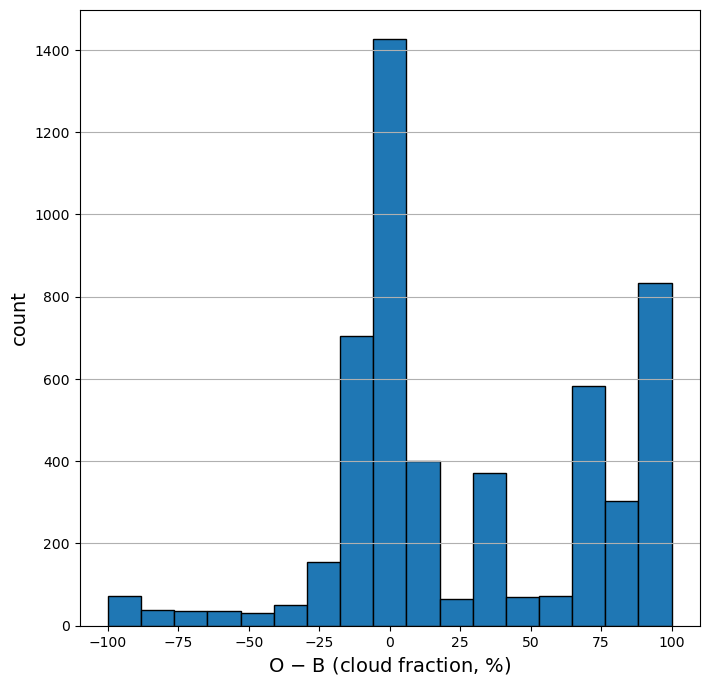

In [4]:
cld_hofx_viz.hist(plot_param={'field':'OmB', 'xlabel':'O $-$ B (cloud fraction, %)'})
plt.show()

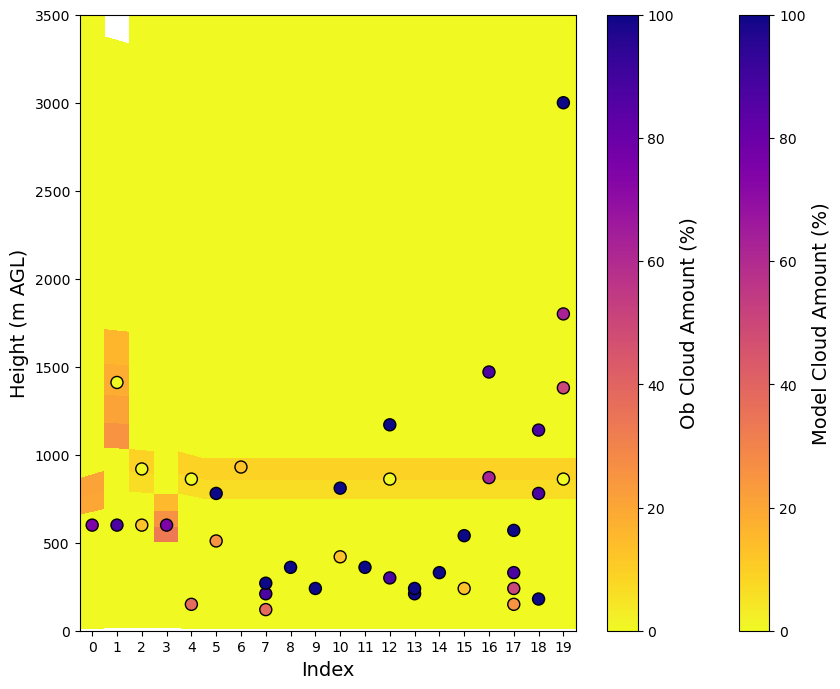

In [5]:
cld_hofx_viz.vert_columns(idx=list(range(20)))
plt.show()

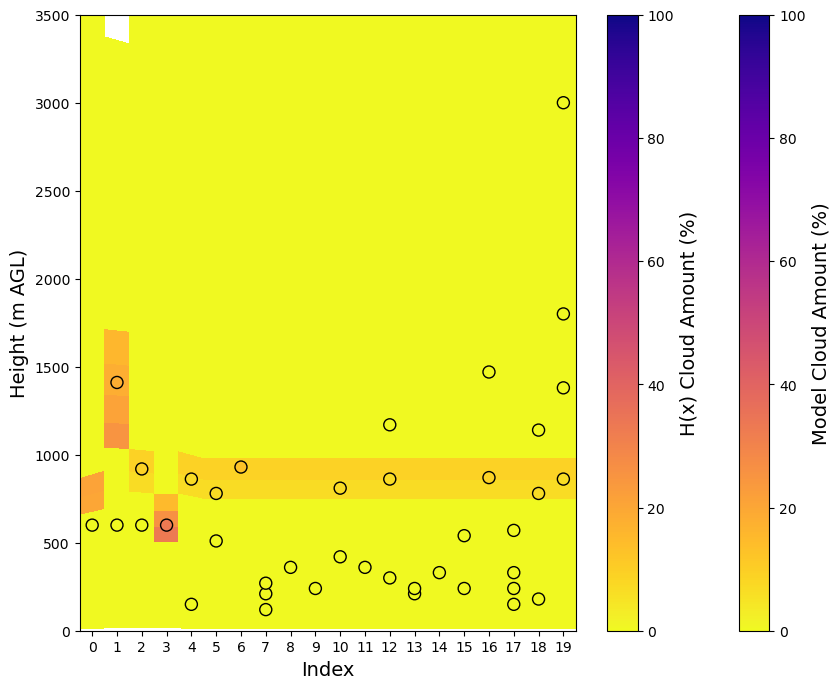

In [8]:
cld_hofx_viz.vert_columns(idx=list(range(20)),
                          pt_param={'field':'hofx', 
                                   'label':'H(x) Cloud Amount (%)', 
                                   'kwargs':{'vmin':0, 'vmax':100, 's':75, 'edgecolors':'k', 'cmap':'plasma_r'}})
plt.show()

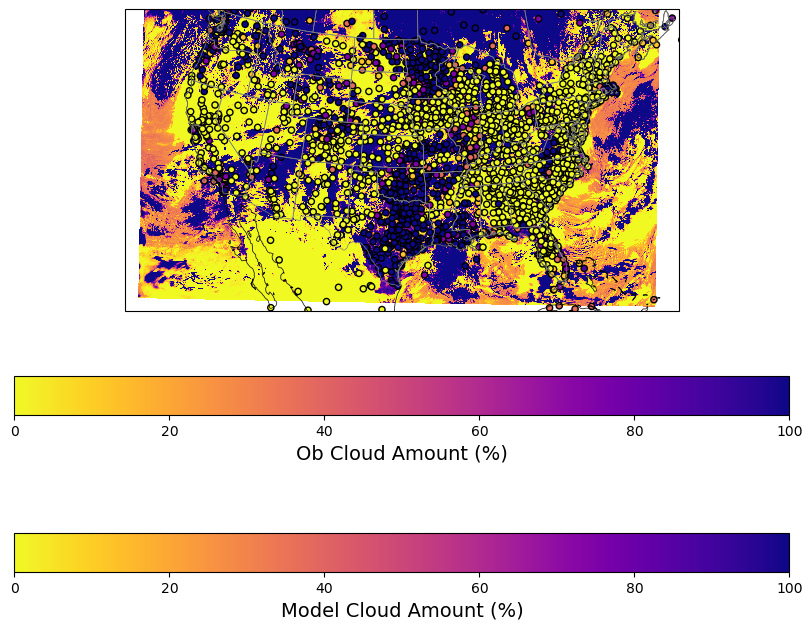

In [7]:
cld_hofx_viz.composite_cld_cover()
plt.show()

In [9]:
cld_hofx.data['model_col_TCDC_P0_L105_GLC0'][15]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 7., 9.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
cld_hofx.data['model_col_height_agl'][15][cld_hofx.data['model_col_TCDC_P0_L105_GLC0'][15] > 0]

array([804.10156, 919.1327 ], dtype=float32)

In [11]:
cld_hofx.data['hofx'][15]

array([12.5,  0. ], dtype=float32)

In [12]:
cld_hofx.data['HOCB'][15]

array([240., 540.])

In [14]:
cld_hofx.data['ob_cld_amt'][15]

array([ 12.5, 100. ])

In [15]:
cld_hofx.data['CLAM'][15]

array([1., 8.])

In [16]:
import scipy.interpolate as si
i = 15
interp_fct = si.interp1d(cld_hofx.data['model_col_height_agl'][i], 
                         cld_hofx.data['model_col_TCDC_P0_L105_GLC0'][i], 
                         kind='nearest',
                         bounds_error=False,
                         fill_value="extrapolate")
interp_fct(cld_hofx.data['HOCB'][i])

array([0., 0.], dtype=float32)

In [7]:
cld_hofx.data.keys()

dict_keys(['idx', 'lat', 'lon', 'TYP', 'SID', 'DHR', 'CLAM', 'HOCB', 'x_proj', 'y_proj', 'model_col_TCDC_P0_L105_GLC0', 'model_col_height_agl', 'ob_cld_amt', 'ob_cld_precision', 'hofx', 'OmB'])

In [11]:
cld_hofx.model_ds['gridlon_0']

<xarray.DataArray 'gridlon_0' (ygrid_0: 1059, xgrid_0: 1799)> Size: 8MB
array([[-122.71953 , -122.69286 , -122.66619 , ...,  -72.34306 ,  -72.31639 ,
         -72.28973 ],
       [-122.72703 , -122.70035 , -122.673676, ...,  -72.33559 ,  -72.30891 ,
         -72.28223 ],
       [-122.73453 , -122.70785 , -122.68116 , ...,  -72.3281  ,  -72.301414,
         -72.274734],
       ...,
       [-134.0648  , -134.02829 , -133.99174 , ...,  -61.020935,  -60.984394,
         -60.947865],
       [-134.08014 , -134.0436  , -134.00705 , ...,  -61.005634,  -60.96908 ,
         -60.93254 ],
       [-134.09547 , -134.05893 , -134.02237 , ...,  -60.990322,  -60.953754,
         -60.917202]], dtype=float32)
Coordinates:
    gridlat_0  (ygrid_0, xgrid_0) float32 8MB 21.14 21.15 21.15 ... 47.85 47.84
    gridlon_0  (ygrid_0, xgrid_0) float32 8MB -122.7 -122.7 ... -60.95 -60.92
Dimensions without coordinates: ygrid_0, xgrid_0
Attributes:
    corners:    [-122.71953   -72.28973   -60.917202 -134.09547 ]
    long_name:  longitude
    grid_type:  Lambert Conformal (secant, tangent, conical or bipolar)
    units:      degrees_east
    Latin2:     [38.5]
    Latin1:     [38.5]
    Dy:         [3.]
    Dx:         [3.]
    Lov:        [262.5]
    Lo1:        [237.28047]
    La1:        [21.138115]